### Student Information
Name:陳彥宇

Student ID: 0756521

GitHub ID: timmychen1996

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Lab 1 exercise question

In [239]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [243]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import math

In [244]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [246]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> Exercise 2 (take home):

In [248]:
X.ix[::25,][:25]

C:\Users\timothy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,1,comp.graphics
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
75,From: brr1@ns1.cc.lehigh.edu (BRANT RICHARD RI...,1,comp.graphics
100,From: mathew <mathew@mantis.co.uk> Subject: Re...,0,alt.atheism
125,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism
150,From: lfoard@hopper.virginia.edu (Lawrence C. ...,3,soc.religion.christian
175,From: dlecoint@garnet.acns.fsu.edu (Darius_Lec...,3,soc.religion.christian
200,From: johnsd2@rpi.edu (Dan Johnson) Subject: R...,3,soc.religion.christian
225,From: sab@gnv.ifas.ufl.edu Subject: Info neede...,1,comp.graphics


### >>> Exercise 5 (take home)

In [249]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [250]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer here.
As the table shows, np.nan is the build in function for creating nan value so did when the data were missing in the blank,
but for the 'NaN' and 'None' and '' , they are all string object, which means that it won't show the nan value. 

### >>> Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? 
Report every change you noticed as compared to the previous state of X. 
Feel free to query and look more closely at the dataframe for these changes.

In [253]:
# Answer here
# As shown below, there is no difference after sample the data from the X dataframe 
X.loc[::15, 'text'][0:10]

0      From: sd345@city.ac.uk (Michael Collier) Subje...
15     From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...
30     From: vgwlu@dunsell.calgary.chevron.com (greg ...
45     From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...
60     From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
75     From: brr1@ns1.cc.lehigh.edu (BRANT RICHARD RI...
90     Subject: Vonnegut/atheism From: dmn@kepler.unh...
105    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
120    From: ray@engr.LaTech.edu (Bill Ray) Subject: ...
135    From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...
Name: text, dtype: object

In [254]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
print(len(X['category'].loc[X['category']==1]))
print(len(X['category'].loc[X['category_name']=='comp.graphics']))
print(len(X))

584
584
2257


### >>> Exercise 8 (take home):
    We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. 
    Below we show you an snapshot of the type of chart we are looking for.

In [256]:
X.category_name.value_counts()

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

In [259]:
X_sample = X.sample(n=1000)

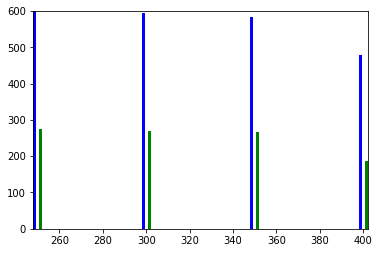

In [260]:
w = 1.4
ax=plt.subplot(111)
x_axis=np.array([250,300,350,400])
X_category_name_value_counts_array = np.array(X.category_name.value_counts())
X_sample_category_name_value_counts_array = np.array(X_sample.category_name.value_counts())
ax.bar( x_axis-w,X_category_name_value_counts_array , width=w,color='b',align='center')
ax.bar( x_axis+w,X_sample_category_name_value_counts_array, width=w,color='g',align='center')
ax.autoscale(tight=True)
plt.show()

In [261]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\timothy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [262]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

Feature subset selection

In [263]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### >>> Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. 
Notice that there is another 1 in the same record. 
Can you provide code that can verify what word this 1 represents from the vocabulary. 
Try to do this as efficient as possible.

In [291]:
X_counts[4:5,0:100].toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [293]:
# Answer here
#As you can see here, the 01 were the feature name of the other 1 in the same record.
fifth_X_counts = X_counts[4:5,0:100].toarray()
feature_name =count_vect.get_feature_names()
index =0
for i in fifth_X_counts[0]:
    if (str(i) == '1'):
        print (feature_name[index])
        index = index +1 
    else:
        index = index +1 

00
01


5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset.

PCA Algorithm

Input: Raw term-vector matrix

Output: Projections

In [294]:
from sklearn.decomposition import PCA

In [295]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

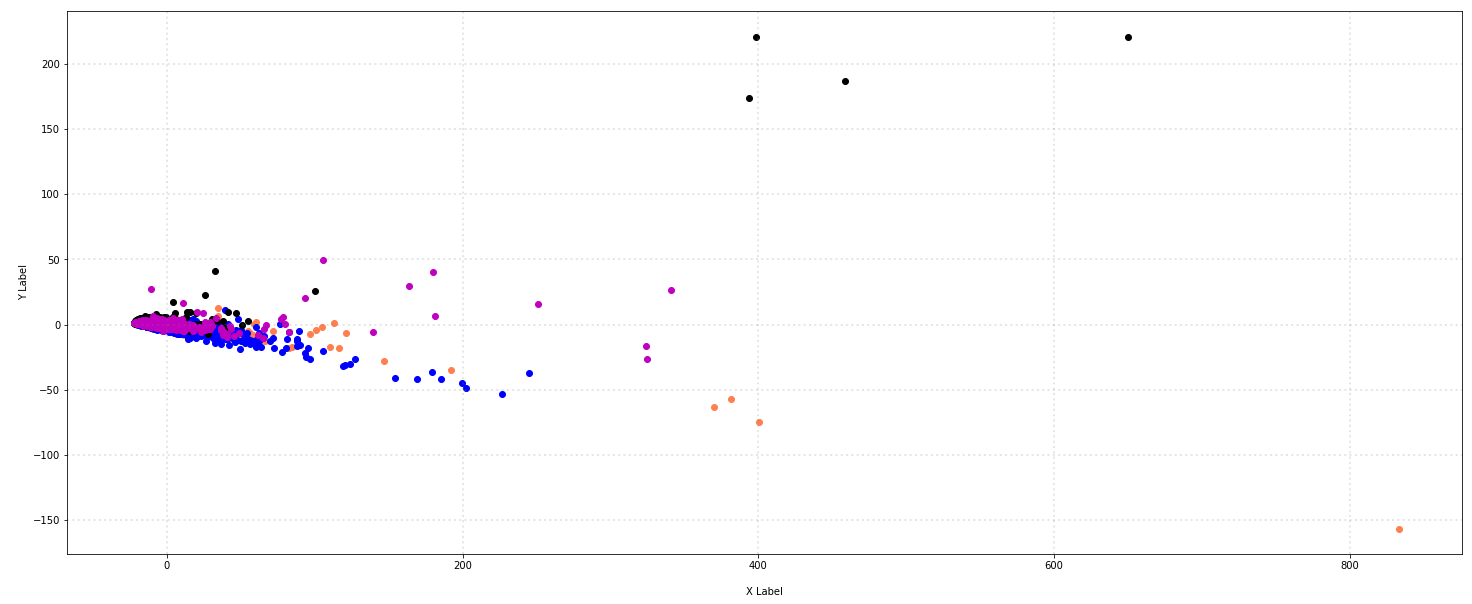

In [296]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):¶
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

HintHint : you can refer to Axes3D in the documentation.

In [298]:
X_reduced_three = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced_three.shape

(2257, 3)

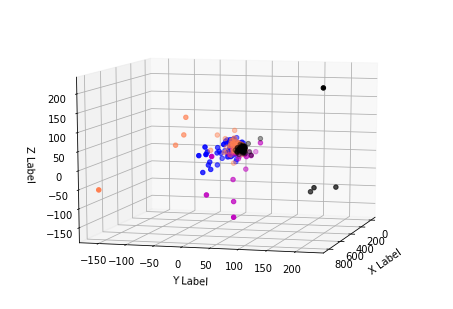

In [299]:
# Answer here(with-different-angle)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
for c, category in zip(col, categories):
    xs = X_reduced_three[X['category_name'] == category].T[0]
    ys = X_reduced_three[X['category_name'] == category].T[1]
    zs = X_reduced_three[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(10, 15)
plt.show()

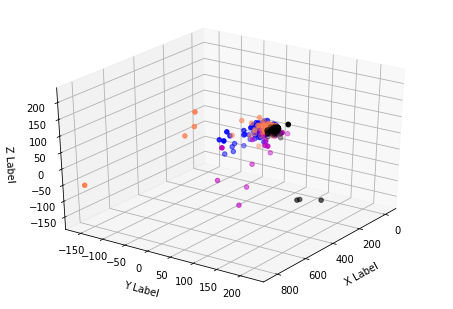

In [300]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
for c, category in zip(col, categories):
    xs = X_reduced_three[X['category_name'] == category].T[0]
    ys = X_reduced_three[X['category_name'] == category].T[1]
    zs = X_reduced_three[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(30, 35)
plt.show()

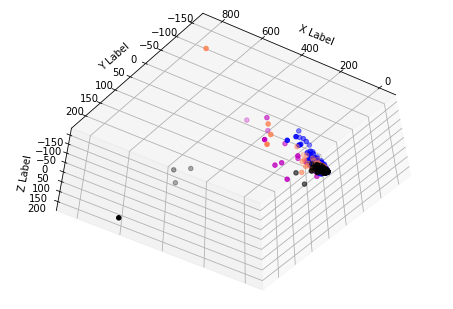

In [302]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
for c, category in zip(col, categories):
    xs = X_reduced_three[X['category_name'] == category].T[0]
    ys = X_reduced_three[X['category_name'] == category].T[1]
    zs = X_reduced_three[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(120, 125)
plt.show()

5.5 Atrribute Transformation / Aggregation

In [303]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [305]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [306]:
term_frequencies[0]

134

### >>> Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. 
Check last year's notebook for code on how to generate the interactive version of the plot above.

In [307]:
import helpers.text_analysis as ta
import plotly as py
import plotly.graph_objs as go

In [308]:
py.tools.set_credentials_file(username='timothychen', api_key='a3jLzqWHlSi4swtlezUj')

In [309]:
# Answer here
py.plotly.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

C:\Users\timothy\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Users\timothy\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### >>> Exercise 14 (take home):¶
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. 
Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [310]:
# Answer here
# I sort the term_frequency array from larger value to smaller value
# then get the one that is bigger than 1000, then plot 
term_frequencies[::-1].sort()

In [311]:
term_frequencies_descending = term_frequencies[[term_frequencies>1000]]
len(term_frequencies_descending)

77

In [312]:
py.plotly.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_descending], "Term Frequency Distribution"))

C:\Users\timothy\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Users\timothy\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. 
This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). 
See picture below



In [314]:
# Answer here
term_frequencies_log = [math.log(i) for i in term_frequencies]
py.plotly.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

C:\Users\timothy\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Users\timothy\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. 
Given our current original dataset, we would like to transform one of the attributes, category_name, into four binary attributes. In other words, we are taking the category name and replacing it with a n asymmetric binary attributes. 
The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. 
Let us take a look at what we want to achieve in code.

In [316]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [317]:
mlb = preprocessing.LabelBinarizer()

In [318]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [319]:
mlb.classes_

array([0, 1, 2, 3], dtype=int64)

In [320]:
X['bin_category'] = mlb.transform(X['category']).tolist()

### >>> Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [321]:
# Answer here
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [322]:
#From the results,we know that the category_name can not be binarizationed, only in the form of integer 
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 0, 0]"


# 1.Create the DataSet

In [2]:
### Begin Assignment Here!
import matplotlib.pyplot as plt
import helpers.data_mining_helpers as dmh
import pandas as pd
import os
import numpy as np

In [3]:
print(os.getcwd())

C:\Users\timothy\Downloads\data_mining\dm_2018_hw_1


In [4]:
files = [("amazon", os.path.join( ".", "sentiment labelled sentences/amazon_cells_labelled.txt")),
         ("imdb", os.path.join( ".", "sentiment labelled sentences/imdb_labelled.txt")),
         ("yelp", os.path.join( ".", "sentiment labelled sentences/yelp_labelled.txt"))]

In [6]:
dfs = []             
for provider, name in files:
    df = pd.read_csv(name, sep="\t")
    df.columns = ["sentance", "label"]
    df["provider"] = provider
    dfs.append(df)
    
data = pd.concat(dfs, axis=0)
print(data.head())

print("shape", data.shape)

                                            sentance  label provider
0                        Good case, Excellent value.      1   amazon
1                             Great for the jawbone.      1   amazon
2  Tied to charger for conversations lasting more...      0   amazon
3                                  The mic is great.      1   amazon
4  I have to jiggle the plug to get it to line up...      0   amazon
shape (2745, 3)


In [7]:
# get the provider and label  using the set function
# the label 0 stands for negative, and the label 1 stands for positive
print(set(data.provider))
print(set(data.label))

{'yelp', 'amazon', 'imdb'}
{0, 1}


# 2. Data Mining

In [8]:
#To check whether there is missing value in each column 
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentance    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
provider    (The amoung of missing records is: , 0)
dtype: object

In [9]:
data.columns

Index(['sentance', 'label', 'provider'], dtype='object')

Check whether there is duplicated data in sentance column, but we are not going to deal with label and provider, since they are 
categorical data.

In [10]:
# As we can see, there are the rows that are duplicated in sentance column 
sentance_array=np.array(data.duplicated('sentance'))
for i in range (len(sentance_array)):
    if (sentance_array[i]==True):
        print(i)

284
406
523
542
743
747
777
791
891
895
1163
1385
1588
2559
2561
2588
2591


In [11]:
data.iloc[284:285,0]

284    Great phone!.
Name: sentance, dtype: object

In [12]:
data.iloc[895:896,0]

895    Great phone.
Name: sentance, dtype: object

# 3.Data Preprocessing

amazon    999
yelp      999
imdb      747
Name: provider, dtype: int64


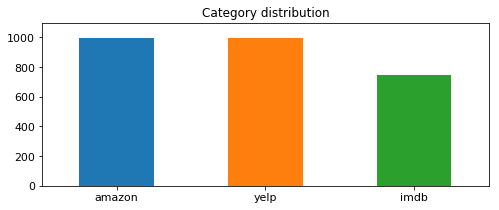

In [13]:
# As we can see, the provider imdb are not as much as yelp and amazon 
print(data.provider.value_counts())
upper_bound = max(data.provider.value_counts())+100
# plot barchart for X_sample
data.provider.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound ],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [14]:
import nltk

In [15]:
data['unigrams'] = data['sentance'].apply(lambda x: dmh.tokenize_text(x))

In [16]:
#These are the sentances that were provided by yelp amazon and imdb
data['sentance'][1]

1                               Great for the jawbone.
1    Attempting artiness with black & white and cle...
1            Not tasty and the texture was just nasty.
Name: sentance, dtype: object

In [17]:
#As you can see, this is that last reviews from amazon 
data.iloc[998:999,]

,sentance,label,provider,unigrams
998,"You can not answer calls with the unit, never ...",0,amazon,"[You, can, not, answer, calls, with, the, unit..."


In [18]:
#As you can see it reset the index to 0 also the provider were from imdb
data.iloc[999:1000,]

,sentance,label,provider,unigrams
0,Not sure who was more lost - the flat characte...,0,imdb,"[Not, sure, who, was, more, lost, -, the, flat..."


In [20]:
index_list =[]
for i in range(2745):
    index_list.append(i)

In [21]:
#Since the original data its index only ranges from 0 to 998, so i change it to the normal index which stancds for each row,
#and rename the dataset 
data['index_list'] = index_list
data_new=data.set_index('index_list')

In [22]:
data_new.iloc[999:1000,]

,sentance,label,provider,unigrams
index_list,,,,
999,Not sure who was more lost - the flat characte...,0,imdb,"[Not, sure, who, was, more, lost, -, the, flat..."


In [23]:
all_words_frequency = nltk.FreqDist(np.array(data_new['unigrams'][0]))

In [24]:
all_words_frequency

FreqDist({'Good': 1, 'case': 1, ',': 1, 'Excellent': 1, 'value': 1, '.': 1})

# 4.TF-IDF

Generating the TF-IDF matrix

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer()
data_new_counts = vectorizer.fit_transform(data_new['sentance'])

In [38]:
len(vectorizer.get_feature_names())

5151

In [27]:
print(vectorizer.get_feature_names())

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', '

In [28]:
data_new_counts.shape

(2745, 5151)

In [264]:
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names()[0:100]]

In [41]:
plot_y_list = []
for i in range (100):
    plot_y_list.append(i)

In [265]:
plot_y = ["sentance"+ str(i) for i in plot_y_list]

In [266]:
plot_z = data_new_counts[0:100, 0:100].toarray()

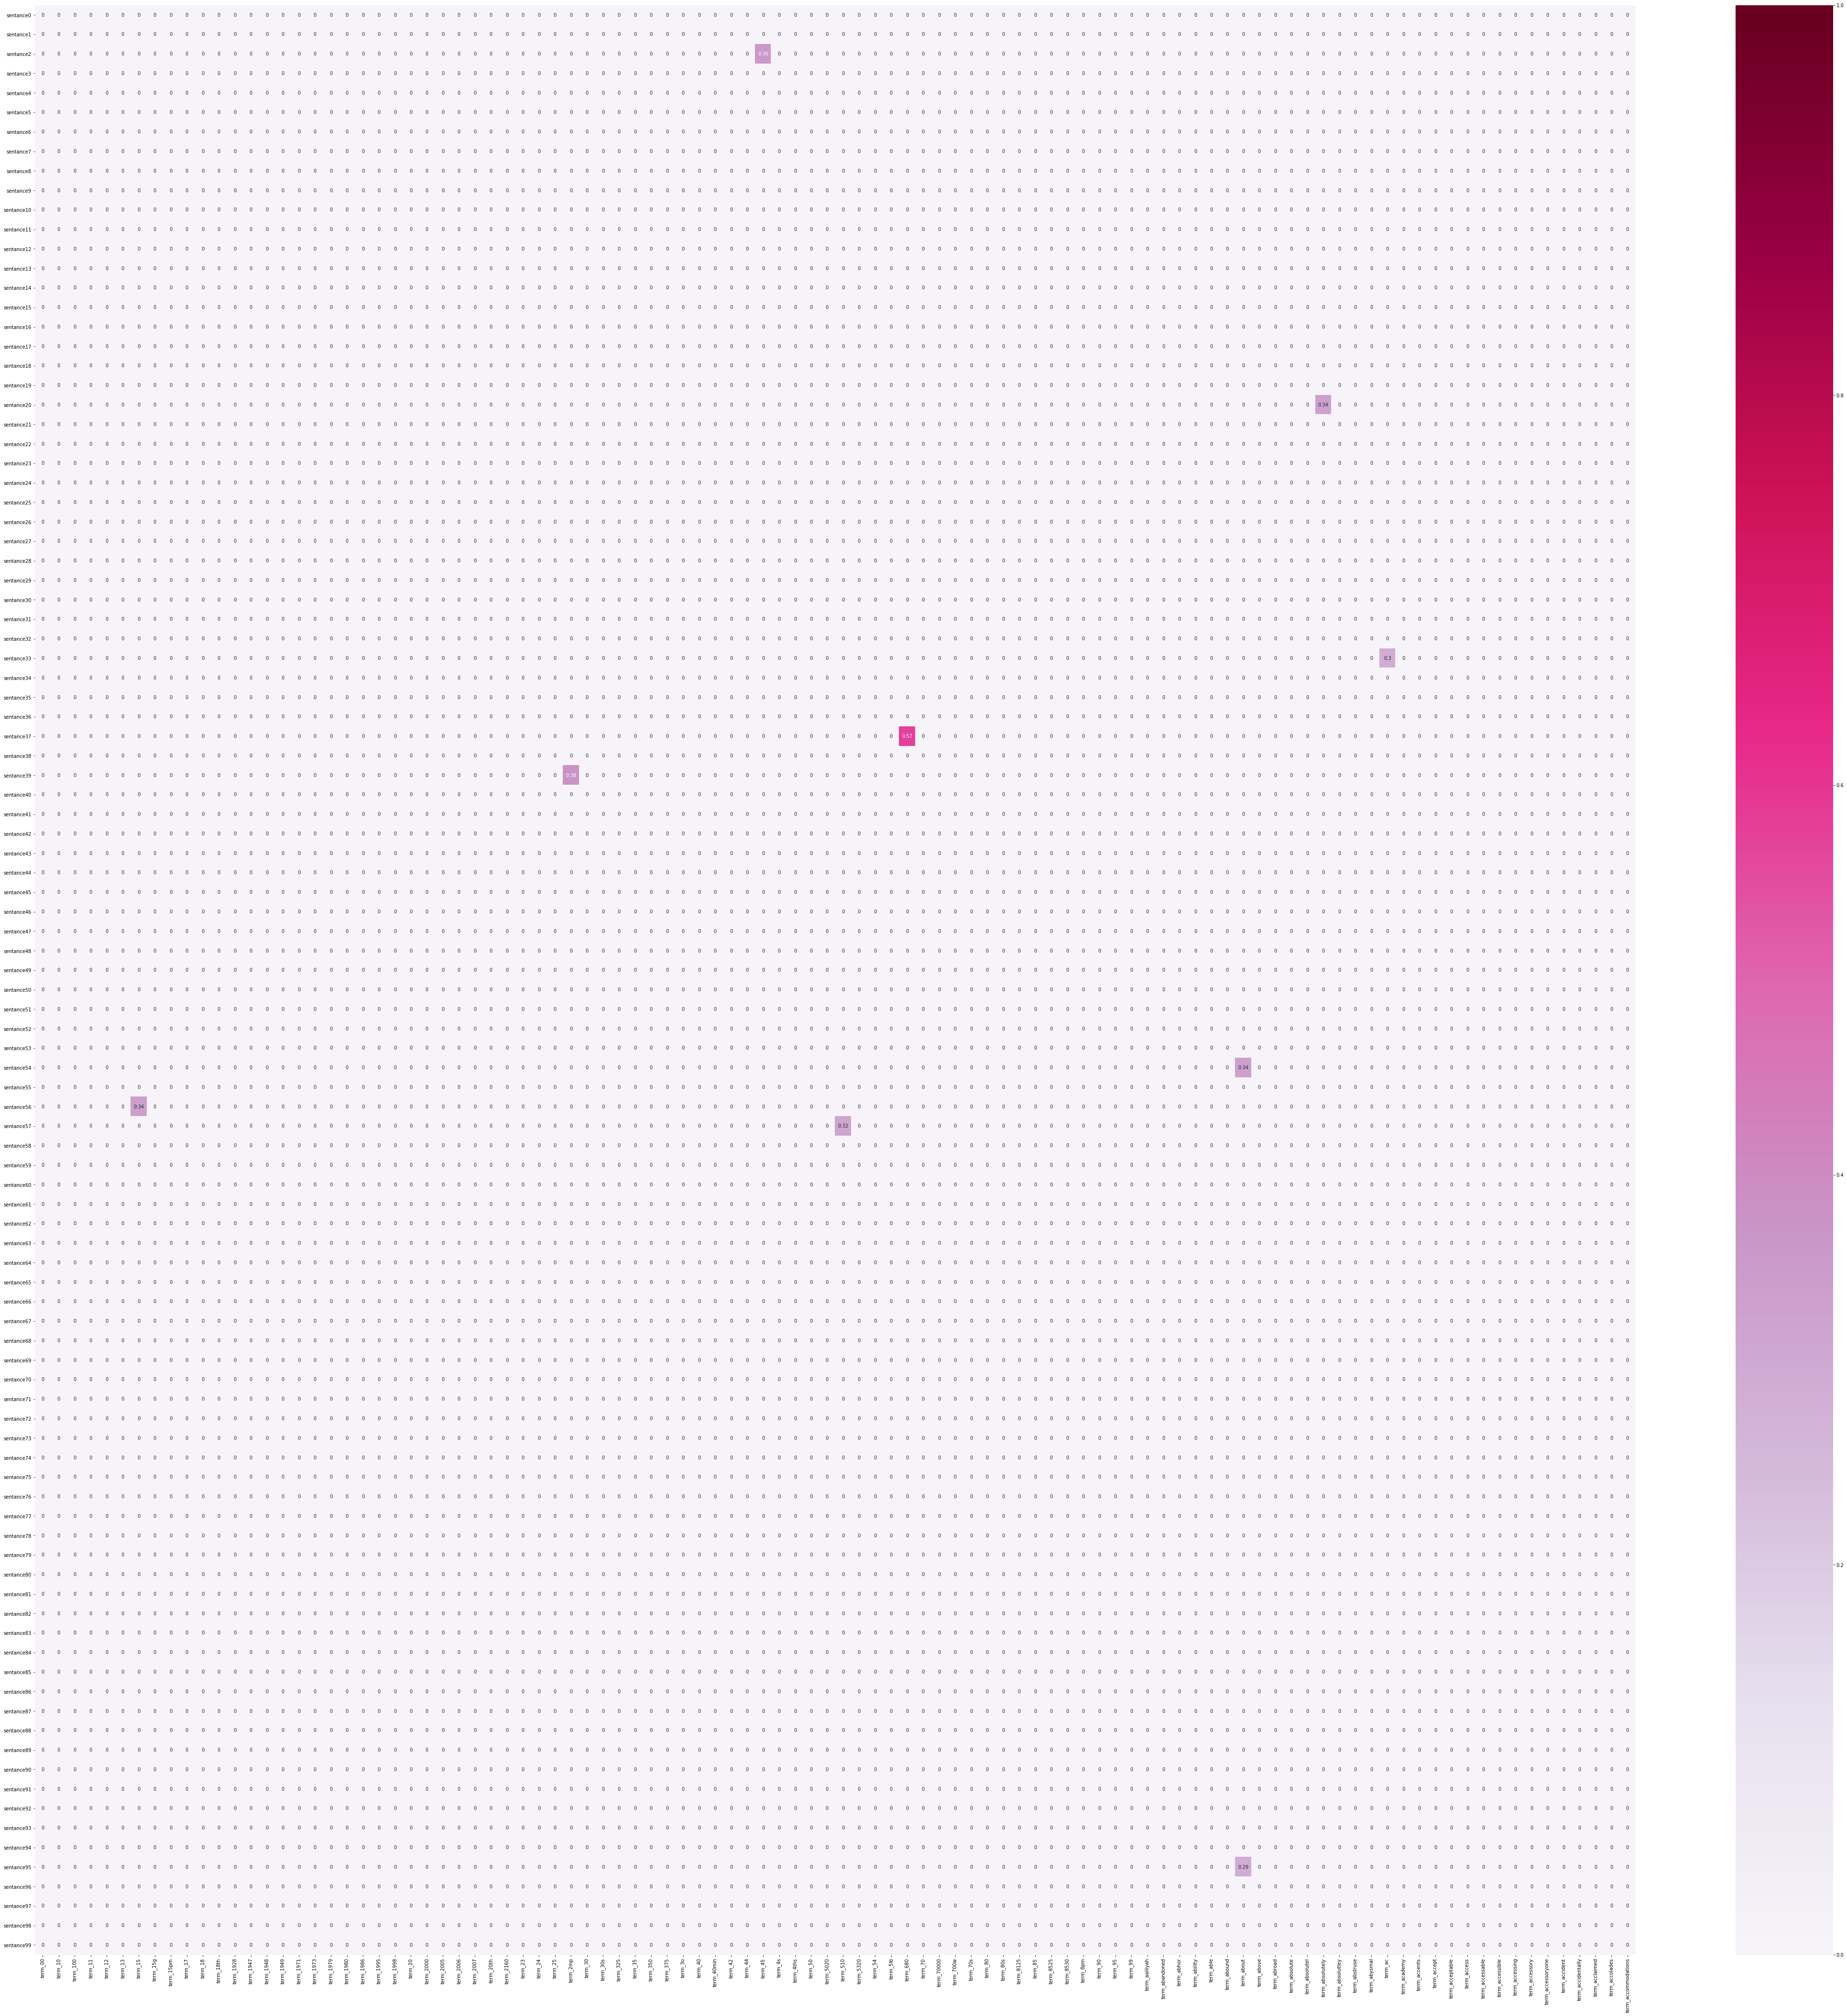

In [267]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(75, 75))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Generating the word frequency matrix

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
data_new_counts_1 = count_vect.fit_transform(data_new['sentance'])

In [50]:
data_new_counts_1.shape

(2745, 5151)

### Now we can try to see the difference between  TF-IDF and word frequency features

In [86]:
#Checking for the fifth sentance whether there is TF-IDF value or not.
#First we try to see any random sentance, in this case i choose the fifth sentance. And to check if there is any words that has the TF-IDF value.
data_new_counts_array=data_new_counts[5:6,0:5151].toarray()
for i in data_new_counts_array[0]:
     if i>0:
        print(i)

0.16664916228565782
0.2679741778128281
0.2782098917537315
0.22094617025408414
0.23198146729718236
0.1343583271662386
0.2926363202907696
0.1552717476965504
0.2679741778128281
0.19661783104403618
0.29332894365130735
0.16228697771596085
0.26003474126906373
0.45777121359569717
0.0649450399684247
0.1826571823412994
0.1928928962822028
0.13333289738541648


In [76]:
#Checking for the fifth sentance whethere there indees has the frequemcy or not.
data_new_counts_1_array=data_new_counts_1[5:6,0:51501].toarray()
for i in data_new_counts_1_array[0]:
     if i>0:
        print(i)

1
1
1
1
1
1
1
1
1
2
2
1
1
2
1
1
1
1


In [77]:
# Now  we can check the cosine similarity 
from scipy import spatial
TF_IDF_vector = data_new_counts_array[0]
Word_frequency_vector = data_new_counts_1_array[0]
similarity_result = 1 -spatial.distance.cosine(TF_IDF_vector,Word_frequency_vector)
similarity_result

0.9444655881279939

# 5.Naive Bayes classifier 

### Naive Bayes classifier was  baed on TF-IDF feature  

In [227]:
#Create the label_array 
label_list = []
for i in data_new['label']:
    label_list.append(i)
label_array = np.array(label_list) 

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [228]:
X=data_new_counts
y=label_array
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [229]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [234]:
y_expect = y_test
y_pred = mnb.predict(X_test)
print (accuracy_score(y_expect,y_pred))

0.8287795992714025


### Naive Bayes classifier was  baed on  feature word frequency 

In [236]:
X_word=data_new_counts_1
y_word=label_array
X_train_word, X_test_word, y_train_word, y_test_word = train_test_split(X_word,y_word,test_size=0.2,random_state=1)

In [237]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_word,y_train_word)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [238]:
y_expect_word = y_test_word
y_pred_word = mnb.predict(X_test_word)
print (accuracy_score(y_expect_word,y_pred_word))

0.8142076502732241


### 6. Concluding Remarks

 From this lab, I learned a lot from data preprocessing to data visualization. Although it looks unfamiliar to me at the first time, it gets better through learning and trying. Thanks for giving me this lab.